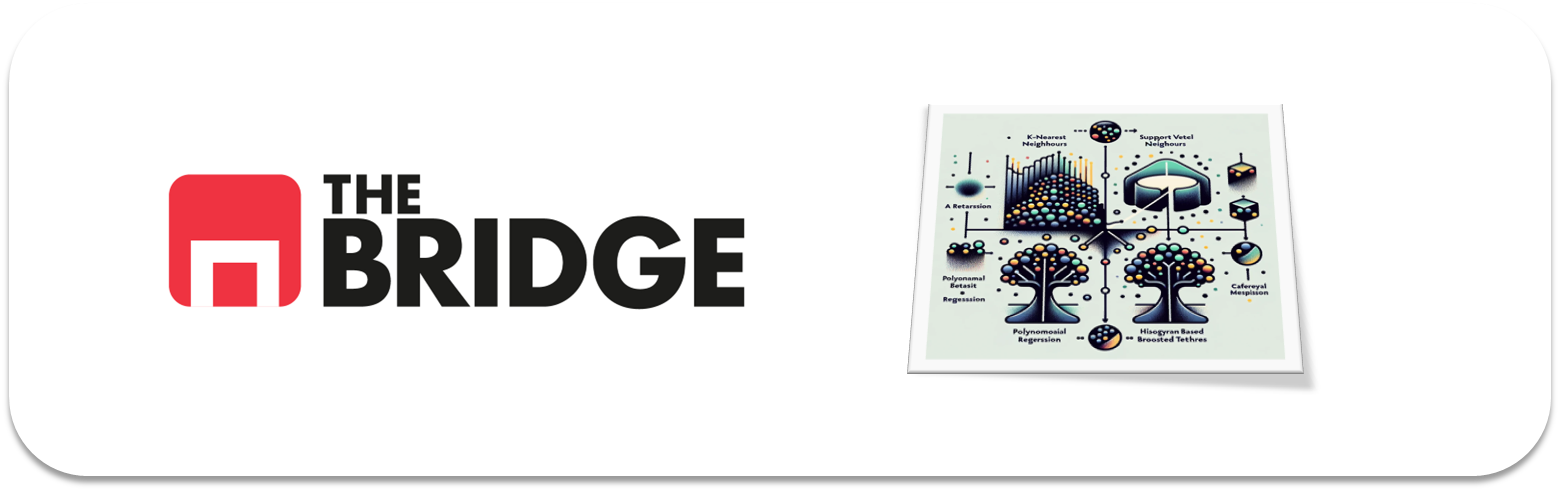

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [141]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import funciones_ML as bt
import bootcampviztools as btv
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np
from scipy.stats import pearsonr, shapiro, chi2
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, mean_absolute_percentage_error, classification_report,ConfusionMatrixDisplay,confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor


# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [28]:
df_wine=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_14\UNIT_2\PRACTICA_OBL\data\wines_dataset.csv", sep="|")

In [29]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


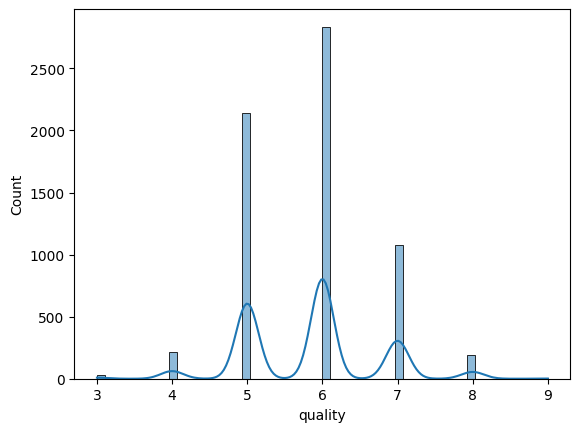

In [30]:
sns.histplot(df_wine.quality, bins="auto",kde=True, legend=True);

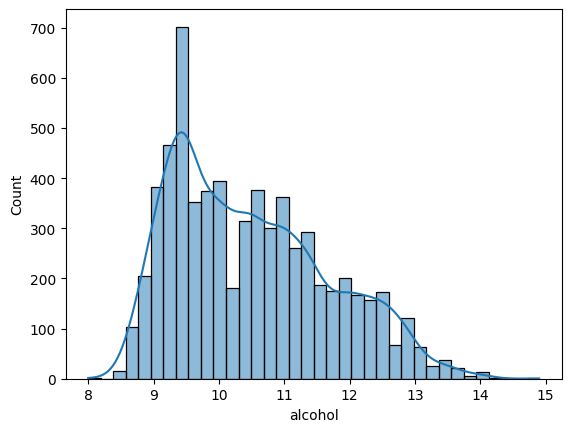

In [31]:
sns.histplot(df_wine.alcohol, bins="auto",kde=True, legend=True);

In [32]:
#le cambio el nombre la target de regresion y clasificacion
df_wine.rename(columns={"alcohol": "target_reg", "quality":"target_clf"}, inplace=True)

### ASSESMENTS

1. TARGET "quality"  MODELO CLASIFICACION

In [33]:

df_wine.target_clf.value_counts()/len(df_wine)*100

target_clf
6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: count, dtype: float64

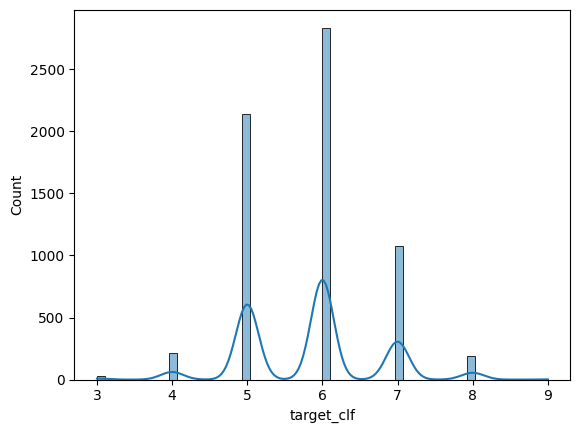

In [34]:
sns.histplot(df_wine.target_clf, bins="auto",kde=True, legend=True);

- La columna quality presenta valores de 1 al 10, basado en datos sensoriales de catadores profesionales, evluando al vino asignandole una nota que cuanto mas alto sea mejor vino es.
- Debido a la distribucion de la target, que dentro del dataset no estan presentes todos los valores y el objetivo de negocio que consiste en anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino, voy a crear un columna binaria, donde todos los valores superior a 5 se le asignara el 1 y los valores por debajo de 5 el valor 0.

In [35]:
# MODELO CLASIFICACION== TARGET_CLF(VALORES DE 1 A 10)
# LA VOY A COMVERTIR EN BINARIA COMO BUSCAMOS LA MEJOR CALIDAD HACEMOS DOS VARIABLES, SI SON > 5 BUENOS Y < 5 NO TENER EN CUENTA

def binaria(quality):
    if quality >5:
        return 1
    else:
        return 0
    
df_wine["target_clf"]= df_wine["target_clf"].apply(binaria)

In [36]:
df_wine.target_clf.value_counts()/len(df_wine)*100

target_clf
1    63.306141
0    36.693859
Name: count, dtype: float64

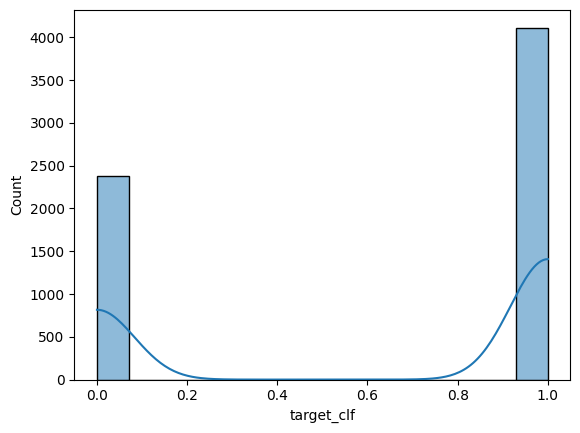

In [37]:
sns.histplot(df_wine.target_clf, bins="auto",kde=True, legend=True);

Como se puede observar esta euilibrada con valores cercanos al 64% en 1 y al 37% en 0

2. TARGET "alcohol" MODELO REGRESION

In [38]:
df_wine.target_reg.value_counts()/len(df_wine)


target_reg
9.500000     0.056488
9.400000     0.051101
9.200000     0.041712
10.000000    0.035247
10.500000    0.034939
               ...   
11.550000    0.000154
12.333333    0.000154
10.566667    0.000154
10.750000    0.000154
11.433333    0.000154
Name: count, Length: 111, dtype: float64

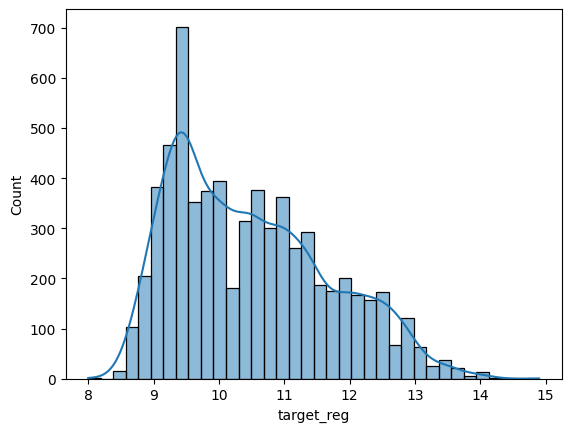

In [39]:
sns.histplot(df_wine.target_reg, bins="auto",kde=True, legend=True);

La variable presenta el porcentaje de alcohol de cada uno de los vinos, presentando una distribucion bastante buena para la regresion

In [40]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [41]:
bt.obtener_estadisticas(df_wine)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
fixed acidity,1.63,float64,7.22,No,1.3,1.68,6.4,7.0,7.7,numerica continua,0.0
volatile acidity,2.88,float64,0.34,No,0.16,0.03,0.23,0.29,0.4,numerica continua,0.0
citric acid,1.37,float64,0.32,No,0.15,0.02,0.25,0.31,0.39,numerica continua,0.0
residual sugar,4.86,float64,5.44,No,4.76,22.64,1.8,3.0,8.1,numerica continua,0.0
chlorides,3.29,float64,0.06,No,0.04,0.0,0.04,0.05,0.06,numerica continua,0.0
free sulfur dioxide,2.08,float64,30.53,No,17.75,315.04,17.0,29.0,41.0,numerica continua,0.0
total sulfur dioxide,4.25,float64,115.74,No,56.52,3194.72,77.0,118.0,156.0,numerica continua,0.0
density,15.36,float64,0.99,No,0.0,0.0,0.99,0.99,1.0,numerica continua,0.0
pH,1.66,float64,3.22,No,0.16,0.03,3.11,3.21,3.32,numerica continua,0.0
sulphates,1.71,float64,0.53,No,0.15,0.02,0.43,0.51,0.6,numerica continua,0.0


la categoria class, solo tiene 2 clases : white o red por lo que la convertire tambien en binaria

In [42]:
df_wine["class"].unique() 

array(['white', 'red'], dtype=object)

In [43]:
df_wine["class"].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

In [44]:
#le cambio el nombre por problemas con el nombre de la columna
df_wine.rename(columns={"class": "class_bin"}, inplace=True)
#quitamos el tipo object de esta columna, conviertandolo en numerica

def binaria(class_bin):
    if class_bin == "white":
        return 1
    else:
        return 0
    
df_wine["class_bin"]= df_wine["class_bin"].apply(binaria)

In [45]:
df_wine["class_bin"].value_counts()


class_bin
1    4898
0    1599
Name: count, dtype: int64

<Axes: >

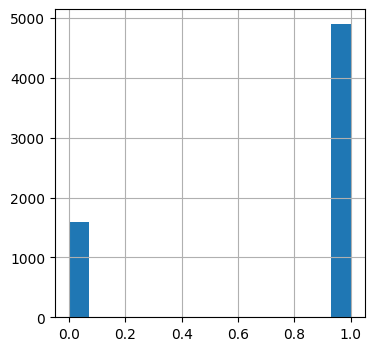

In [46]:
df_wine.class_bin.hist(figsize=(4,4), bins="auto")

Como se puede observar sigue con los mismo elementos y distribucion 

In [47]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  target_reg            6497 non-null   float64
 11  target_clf            6497 non-null   int64  
 12  class_bin             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [48]:
df_wine.head()# hay que standarizar ya que son valores y metricas diferentes, pero antes veremos no hay que logaritmizar antes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target_reg,target_clf,class_bin
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,1,1
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,1,1
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,1,1
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,0,1
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,1,0


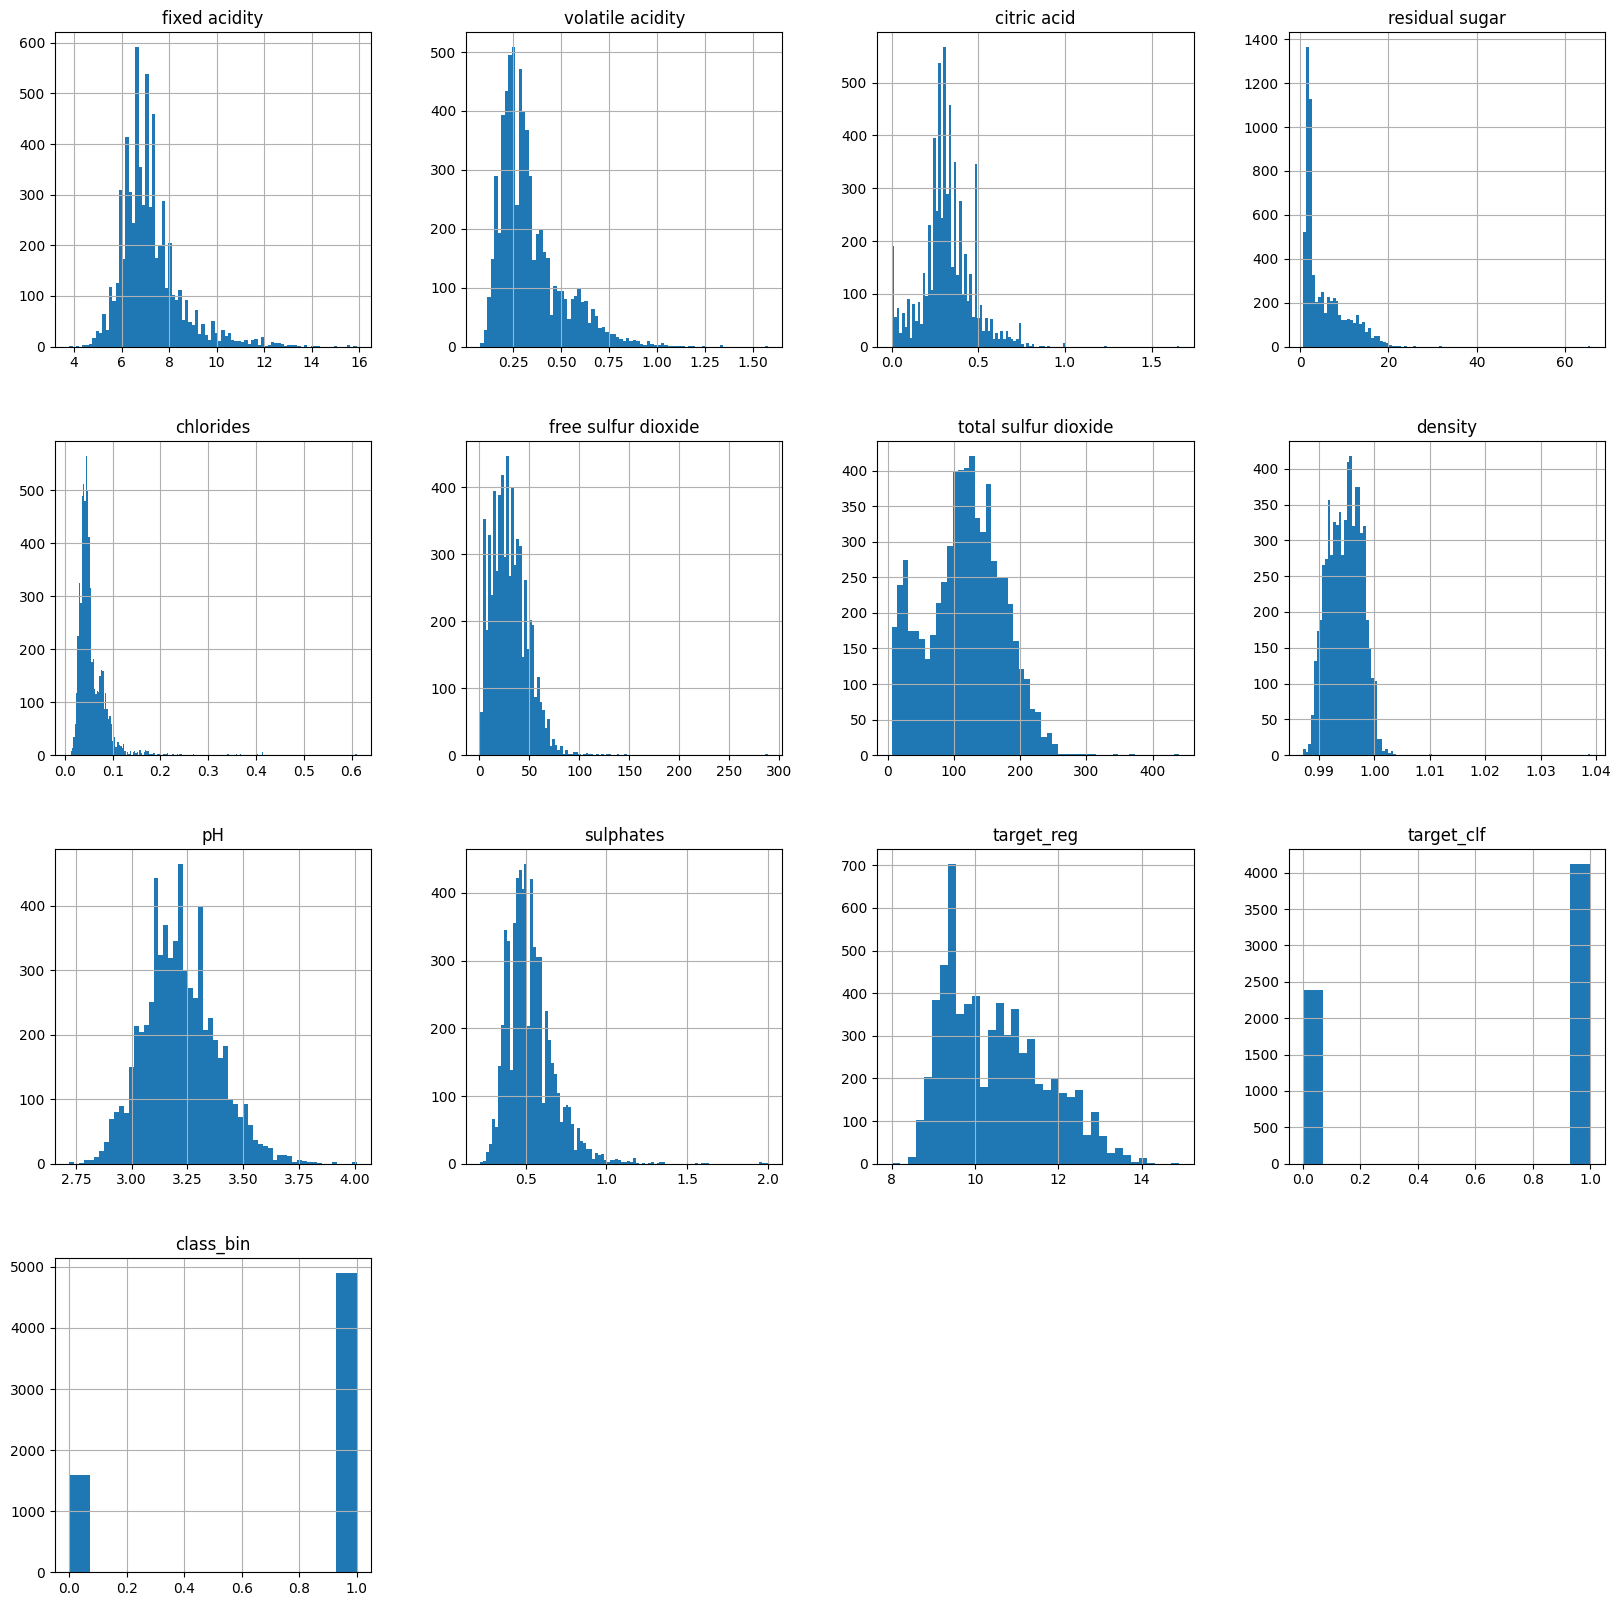

In [49]:
df_wine.hist(figsize=(20,20), bins="auto");

1. Para el objetivo del modelado clasificatorio voy a logaritmizar todas menos la target_clf y clas_bin.
2. Para el objetivo de modelado regresivo logaritmizare todo

CELDA APLICAR SOLO PARA PRIMER OBJETIVO - MODELO CLASIFICATORIO

In [21]:
# logaritmizo
df_wine_log = np.log1p(df_wine.drop(["target_clf", "class_bin"], axis=1))


CELDA APLICAR SOLO PARA SEGUNDO OBJETIVO - MODELO DE REGRESIÓN


Para el modelo de regresion vuelvo a contruir la quality como estaba en wine

In [52]:
df_wine=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_14\UNIT_2\PRACTICA_OBL\data\wines_dataset.csv", sep="|")

In [56]:
df_wine_reg=df_wine.copy()

In [57]:
#le cambio el nombre la target de regresion y clasificacion
df_wine_reg.rename(columns={"alcohol": "target_reg",}, inplace=True)

In [62]:
#le cambio el nombre por problemas con el nombre de la columna
df_wine_reg.rename(columns={"class": "class_bin"}, inplace=True)
#quitamos el tipo object de esta columna, conviertandolo en numerica

def binaria(class_bin):
    if class_bin == "white":
        return 1
    else:
        return 0
    
df_wine_reg["class_bin"]= df_wine_reg["class_bin"].apply(binaria)

In [63]:
df_wine_reg.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target_reg,quality,class_bin
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,1
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,1
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,1
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,1
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,0


In [64]:
# logaritmizo
df_wine_log = np.log1p(df_wine_reg)

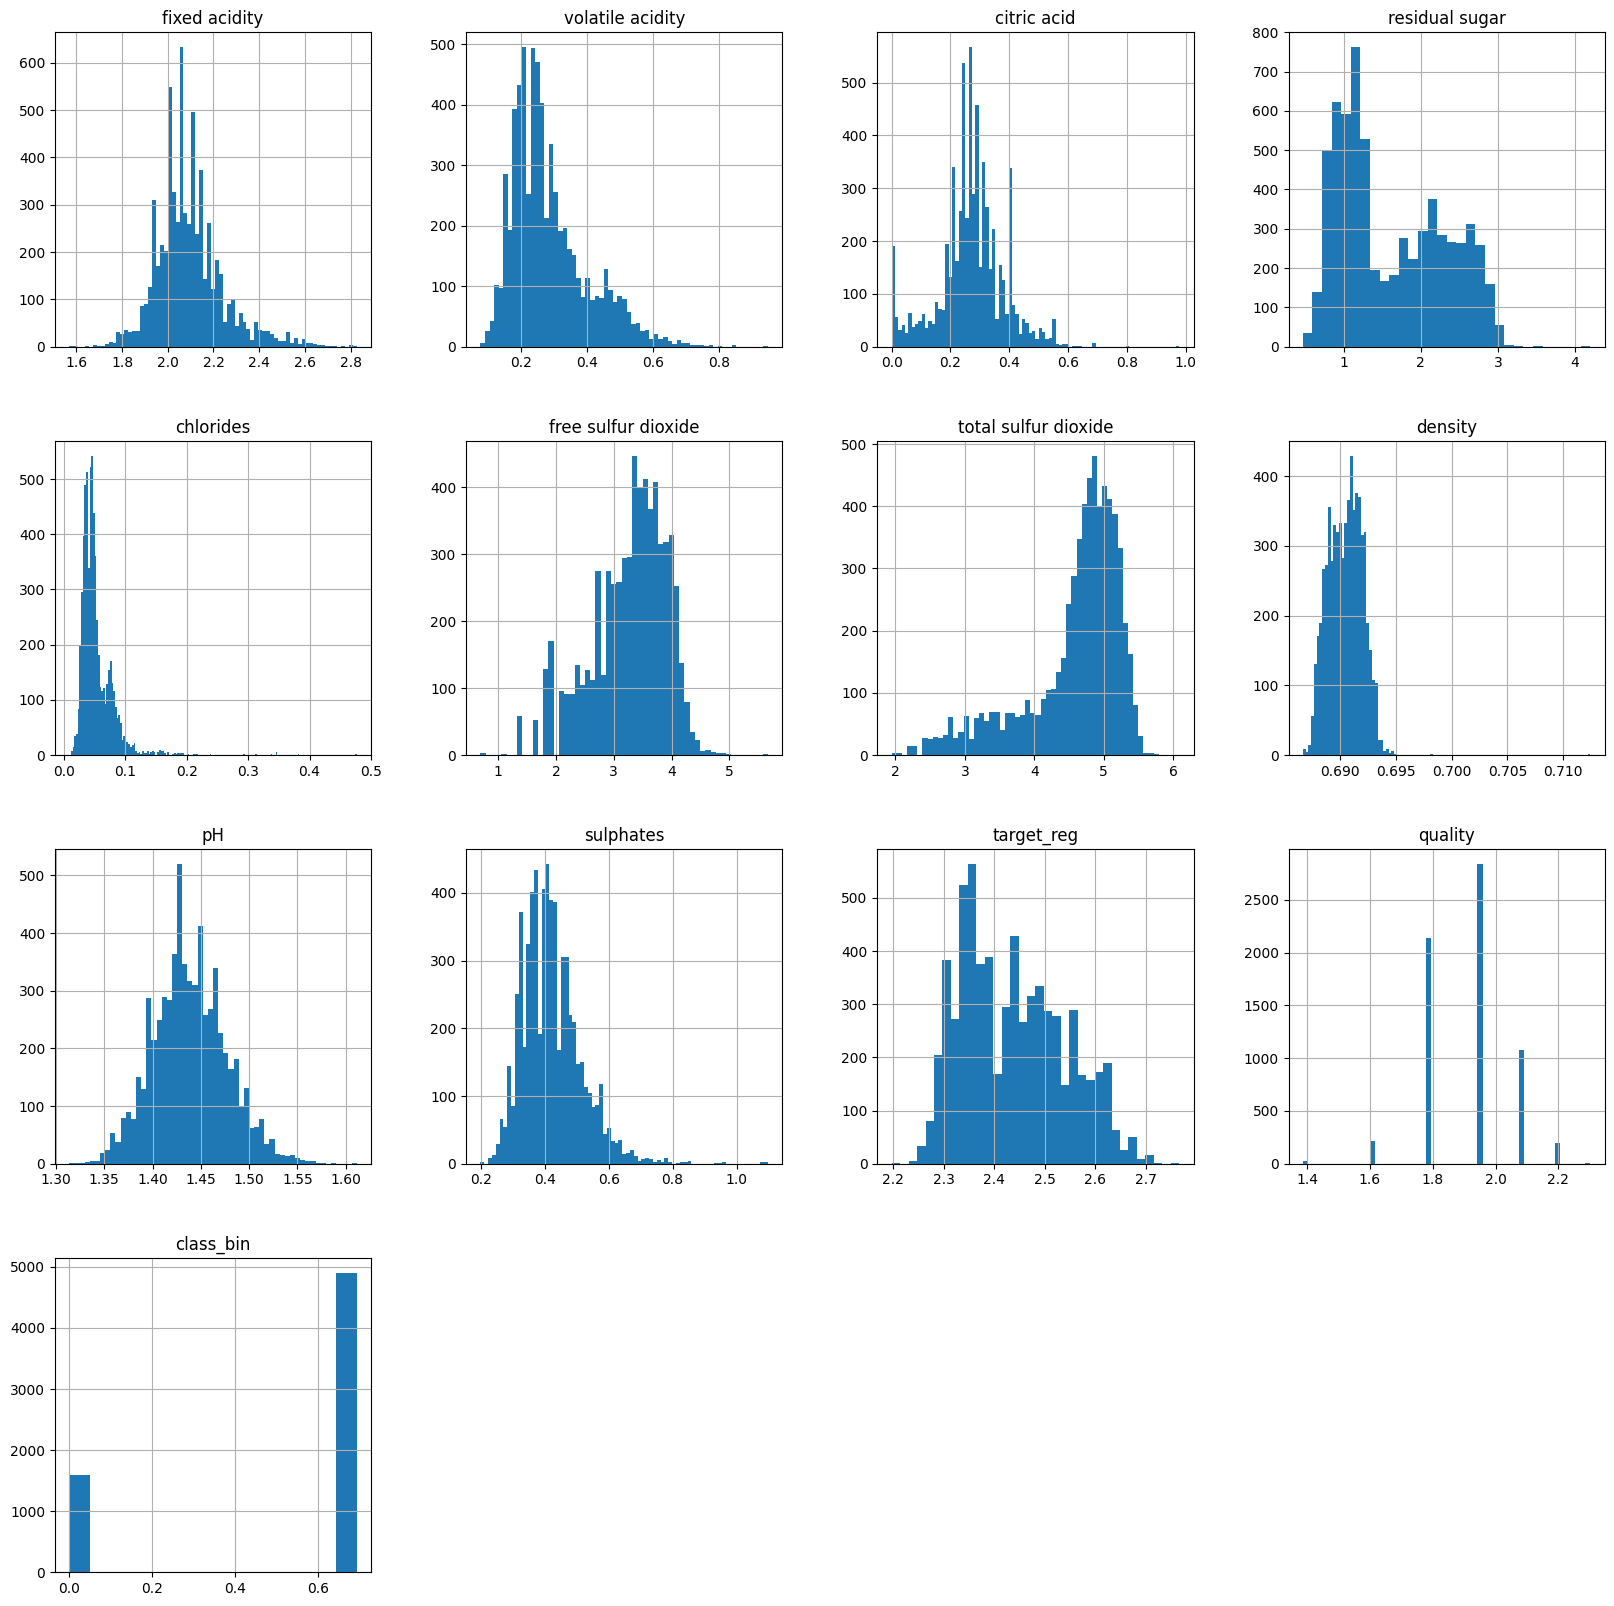

In [65]:
df_wine_log.hist(figsize=(20,20), bins="auto");#  logarotmizada

In [66]:
#estanadarizo a valores cercanos a 0 y 1
df_wine_stand=StandardScaler().fit_transform(df_wine_log)
df_wine_stand


array([[ 1.07800021, -0.82720524, -0.35891319, ...,  0.79927644,
         0.26704438,  0.57136659],
       [ 0.93129393, -1.19495695,  0.4024849 , ...,  1.18790133,
         0.26704438,  0.57136659],
       [-0.28146081, -1.04598884,  0.46864416, ...,  0.63942041,
         1.29821001,  0.57136659],
       ...,
       [ 0.22950885, -0.13522104,  1.10504751, ..., -0.9298923 ,
        -0.92334897,  0.57136659],
       [ 0.93129393,  1.87561579, -1.59428054, ..., -0.8358157 ,
        -0.92334897, -1.75018984],
       [ 1.00503725,  1.9806101 , -0.87887517, ..., -1.12079013,
        -2.33128548, -1.75018984]])

In [67]:
columnas_log = df_wine_log.columns
df_wine_stand=pd.DataFrame(df_wine_stand,columns=columnas_log) 

CELDA SOLO APLICAR PRIMER OBJETIVO - MODELO CLASIFICATORIO

In [26]:
incluimos= ["target_clf", "class_bin"]
df_wine_stand = pd.concat([df_wine_stand, df_wine[incluimos]], axis=1)

In [68]:
df_wine_stand

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target_reg,quality,class_bin
0,1.078000,-0.827205,-0.358913,1.035834,-0.668765,1.581893,0.550093,-0.064855,-1.056361,-1.167179,0.799276,0.267044,0.571367
1,0.931294,-1.194957,0.402485,0.828787,-0.952734,0.604676,0.148529,-0.545502,-1.849842,-1.167179,1.187901,0.267044,0.571367
2,-0.281461,-1.045989,0.468644,-1.092614,-0.543350,0.482554,0.200553,-0.966354,0.646246,0.458258,0.639420,1.298210,0.571367
3,-0.929784,-0.474346,-0.431399,-0.380828,-0.262922,3.665722,2.161136,-0.518790,1.369065,0.796198,0.058521,-4.054460,0.571367
4,0.311107,1.769341,-0.287001,-0.765471,0.835188,-0.574982,-0.080843,0.488795,0.277272,0.389396,-0.558870,0.267044,-1.750190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.471461,0.381340,0.201070,1.139364,0.015105,0.482554,0.871302,0.902064,0.277272,0.526688,-0.201342,-0.923349,0.571367
6493,0.856753,2.288210,-0.727257,-0.919937,0.564121,-2.251138,-2.774114,0.702127,-0.096937,-0.033157,-0.835816,-0.923349,-1.750190
6494,0.229509,-0.135221,1.105048,1.613490,-0.418416,1.336362,1.065314,1.201857,-0.991302,0.458258,-0.929892,-0.923349,0.571367
6495,0.931294,1.875616,-1.594281,-0.380828,1.014651,-0.574982,-1.237007,1.111933,0.462404,0.180164,-0.835816,-0.923349,-1.750190


#### SPLIT SOLO PARA MODELO CLASIFICATORIO

In [29]:

X= df_wine_stand.drop(["target_clf"], axis=1)
y= df_wine_stand["target_clf"]

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5197, 12)
(1300, 12)
(5197,)
(1300,)


### SPLIT SOLO PARA MODELO DE REGRESION

In [69]:

X= df_wine_stand.drop(["target_reg"], axis=1)
y= df_wine_stand["target_reg"]

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


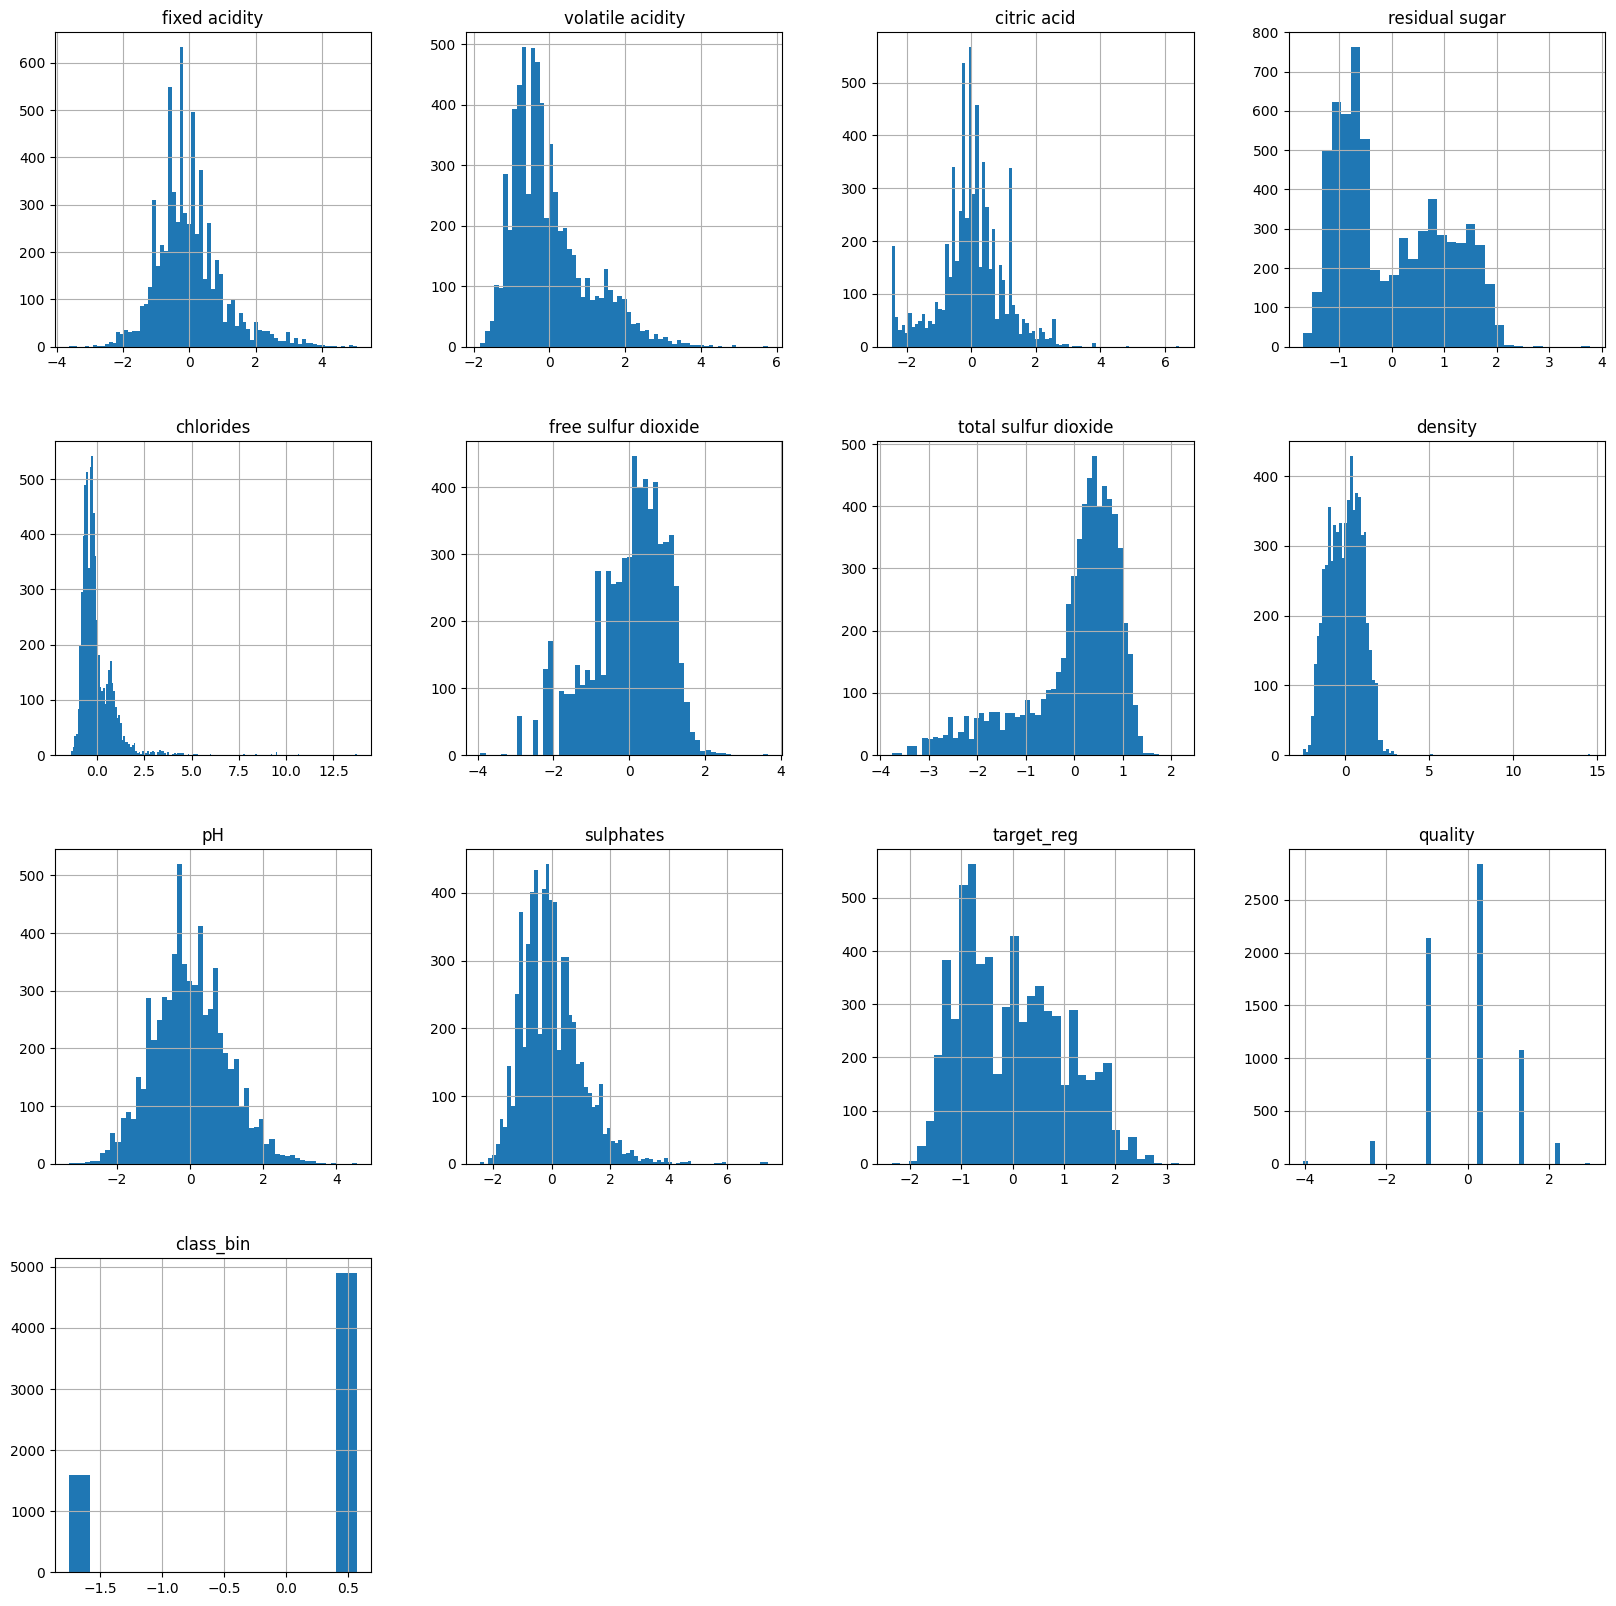

In [70]:
df_wine_stand.hist(figsize=(20,20), bins="auto");

In [71]:
df_wine_stand.target_reg.value_counts()/len(df_wine_stand)*100

target_reg
-0.835816    5.648761
-0.929892    5.110051
-1.120790    4.171156
-0.378481    3.524704
 0.058521    3.493920
               ...   
 0.917485    0.015392
 1.512714    0.015392
 0.115348    0.015392
 0.269947    0.015392
 0.825668    0.015392
Name: count, Length: 111, dtype: float64

In [73]:
corr_clf=df_wine_stand.corr(numeric_only=True).sort_values(by="target_clf")

KeyError: 'target_clf'

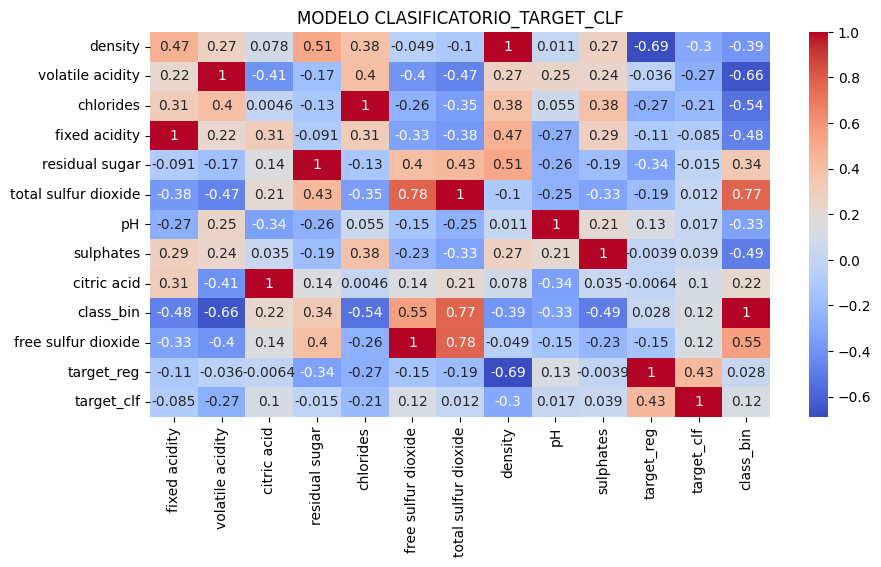

In [34]:
#MODELO CLASIFICATORIO
plt.figure(figsize=(10,5))
sns.heatmap(corr_clf, annot=True, cmap='coolwarm')
plt.title('MODELO CLASIFICATORIO_TARGET_CLF')
plt.show()

In [74]:
corr_reg=df_wine_stand.corr(numeric_only=True).sort_values(by="target_reg")

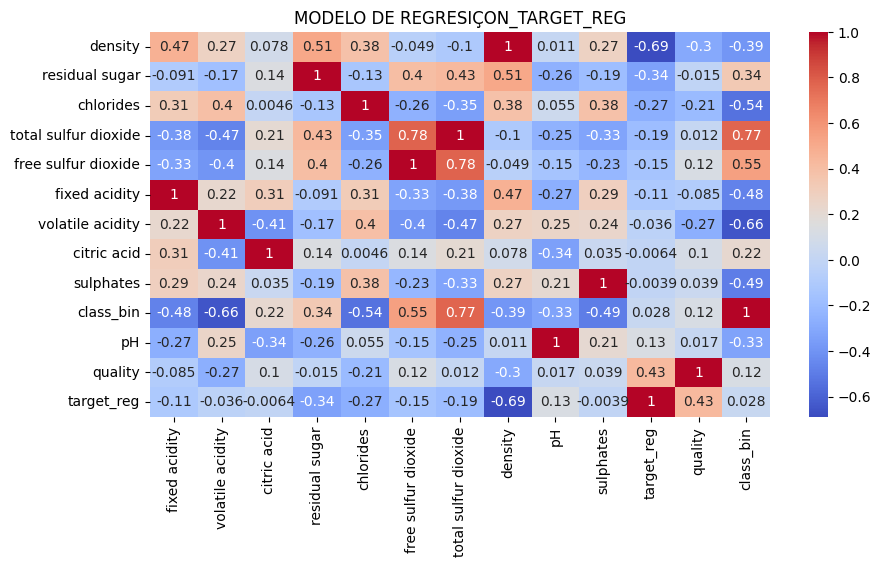

In [75]:
#MODELO DE REGRESION
plt.figure(figsize=(10,5))
sns.heatmap(corr_reg, annot=True, cmap='coolwarm')
plt.title('MODELO DE REGRESIÇON_TARGET_REG')
plt.show()

In [36]:
corr=df_wine_stand.corr(numeric_only=True).sort_values(by="target_clf", ascending=False).T

In [76]:
corr=df_wine_stand.corr(numeric_only=True).sort_values(by="target_reg", ascending=False).T

In [77]:
corr

,target_reg,quality,pH,class_bin,sulphates,citric acid,volatile acidity,fixed acidity,free sulfur dioxide,total sulfur dioxide,chlorides,residual sugar,density
fixed acidity,-0.108674,-0.085329,-0.270547,-0.476277,0.287896,0.305836,0.222132,1.000000,-0.332448,-0.378687,0.314678,-0.090504,0.465620
volatile acidity,-0.035527,-0.272446,0.253087,-0.655396,0.237932,-0.408171,1.000000,0.222132,-0.398332,-0.468317,0.397374,-0.170231,0.273279
citric acid,-0.006393,0.102862,-0.342045,0.220478,0.035286,1.000000,-0.408171,0.305836,0.136466,0.207128,0.004576,0.141686,0.078421
residual sugar,-0.335368,-0.014537,-0.257767,0.337248,-0.186336,0.141686,-0.170231,-0.090504,0.401442,0.430306,-0.131494,1.000000,0.513575
chlorides,-0.269297,-0.206135,0.054964,-0.538494,0.383554,0.004576,0.397374,0.314678,-0.259418,-0.348980,1.000000,-0.131494,0.384171
free sulfur dioxide,-0.145494,0.118300,-0.146476,0.547644,-0.226880,0.136466,-0.398332,-0.332448,1.000000,0.781040,-0.259418,0.401442,-0.049080
total sulfur dioxide,-0.188510,0.012141,-0.251210,0.771210,-0.325880,0.207128,-0.468317,-0.378687,0.781040,1.000000,-0.348980,0.430306,-0.104548
density,-0.688979,-0.295654,0.011278,-0.390848,0.268498,0.078421,0.273279,0.465620,-0.049080,-0.104548,0.384171,0.513575,1.000000
pH,0.127917,0.017319,1.000000,-0.328566,0.210275,-0.342045,0.253087,-0.270547,-0.146476,-0.251210,0.054964,-0.257767,0.011278
sulphates,-0.003913,0.039348,0.210275,-0.494685,1.000000,0.035286,0.237932,0.287896,-0.226880,-0.325880,0.383554,-0.186336,0.268498


In [78]:
bt.obtener_estadisticas(df_wine_stand)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
fixed acidity,1.63,float64,-0.0,No,1.0,1.0,-0.64,-0.11,0.47,numerica continua,0.0
volatile acidity,2.88,float64,-0.0,No,1.0,1.0,-0.68,-0.27,0.44,numerica continua,0.0
citric acid,1.37,float64,0.0,No,1.0,1.0,-0.43,-0.0,0.53,numerica continua,0.0
residual sugar,4.86,float64,0.0,No,1.0,1.0,-0.87,-0.34,0.86,numerica continua,0.0
chlorides,3.29,float64,0.0,No,1.0,1.0,-0.54,-0.26,0.29,numerica continua,0.0
free sulfur dioxide,2.08,float64,-0.0,No,1.0,1.0,-0.57,0.2,0.72,numerica continua,0.0
total sulfur dioxide,4.25,float64,0.0,No,1.0,1.0,-0.32,0.29,0.68,numerica continua,0.0
density,15.36,float64,0.0,No,1.0,1.0,-0.79,0.07,0.77,numerica continua,0.0
pH,1.66,float64,-0.0,No,1.0,1.0,-0.67,-0.03,0.65,numerica continua,0.0
sulphates,1.71,float64,-0.0,No,1.0,1.0,-0.7,-0.11,0.53,numerica continua,0.0


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

1. KNN

In [40]:
# modelo KNC
knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)

print(f"el informe de clasificación con el modelo KNC es :\n {classification_report(y_test, y_pred)}")
print(f"La puntuación del modelo en los valores test es:\n :{knn_clf.score(X_test, y_test)}")
print(f"La puntuación del modelo en los valores train es:\n :{knn_clf.score(X_train, y_train)}")
print(f"los valores de la predicción del modelo en valor test son:\n {knn_clf.predict(X_test)}")
print(f"Los valores de la predicción del modelo en valor train son:\n {knn_clf.predict(X_train)}")

el informe de clasificación con el modelo KNC es :
               precision    recall  f1-score   support

           0       0.69      0.61      0.65       481
           1       0.79      0.84      0.81       819

    accuracy                           0.76      1300
   macro avg       0.74      0.73      0.73      1300
weighted avg       0.75      0.76      0.75      1300

La puntuación del modelo en los valores test es:
 :0.7561538461538462
La puntuación del modelo en los valores train es:
 :0.833172984414085
los valores de la predicción del modelo en valor test son:
 [1 1 1 ... 1 0 0]
Los valores de la predicción del modelo en valor train son:
 [1 1 0 ... 1 1 1]


In [41]:
#OPTIMIZAMOS

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2],  # Distancia de Minkowski 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
    'n_jobs': [-1]  # Usa todas las CPU's disponibles
}

# Crea un modelo de KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Configura GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)



print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
print(grid_search.scorer_)
print(grid_search.cv_results_)
print(grid_search.n_splits_)
print(grid_search.refit_time_)
print(grid_search.classes_)

                                   
                                

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=10, metric='manhattan', n_jobs=-1, n_neighbors=9,
                     p=1, weights='distance')
0.8087352854075665
29
make_scorer(accuracy_score, response_method='predict')
{'mean_fit_time': array([0.015558  , 0.02593136, 0.03011937, 0.0135632 , 0.02074471,
       0.01396198, 0.02034521, 0.01276507, 0.02293835, 0.01296506,
       0.02772532, 0.01376257, 0.01296601, 0.02194104, 0.0378983 ,
       0.03351002, 0.02074394, 0.02114282, 0.02094126, 0.01416144,
       0.02473388, 0.01276488, 0.0135632 , 0.02094316, 0.02393541,
       0.01396194, 0.02433462, 0.02971845, 0.01615562, 0.02493377,
       0.02383904, 0.01436014, 0.01017232, 0.01815109, 0.0179512 ,
       0.02473269, 0.02074499, 0.03091693, 0.01515961, 0.02014456,
       0.01535835, 0.02433429, 0.01515899, 0.01196771, 0.01655669,
       0.01057096, 0.02473354, 0.01675506, 0.01775

el informe de clasificación con el modelo KNC mejores parametros es :
               precision    recall  f1-score   support

           0       0.83      0.68      0.75       481
           1       0.83      0.92      0.87       819

    accuracy                           0.83      1300
   macro avg       0.83      0.80      0.81      1300
weighted avg       0.83      0.83      0.83      1300



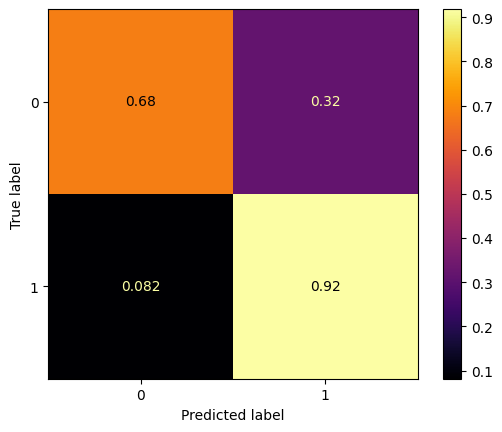

In [42]:
# Volvemos a modelar con los parametros estimados por el grid
knn_clf_h1=KNeighborsClassifier(algorithm="auto",leaf_size=10, metric='manhattan', n_jobs=-1, n_neighbors=9,
                     p=1, weights='distance')

# entrenamos el modelo con los datos de entrenamiento y lo evaluamos con los datos de prueba
knn_clf_h1.fit(X_train, y_train)
y_pred_h1=knn_clf_h1.predict(X_test)


print(f"el informe de clasificación con el modelo KNC mejores parametros es :\n {classification_report(y_test, y_pred_h1)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_h1, normalize='true', cmap='inferno')


In [219]:
# Anova o analisi de varianza, compara medias de 3 o mas gruposdeterminando las mas significativas
bt.features_anova(X_train, y_train)

AttributeError: module 'funciones_ML' has no attribute 'features_anova'

In [113]:
# PROBAMOS EQUILIBRA LA CLASE MINORITARIA CON SMOTE A VER QUE SALE

smote = SMOTE(random_state=42, sampling_strategy=0.8, n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [114]:
y_train.value_counts()/len(y_train)*100

target_clf
1    63.382721
0    36.617279
Name: count, dtype: float64

In [112]:
y_train_smote.value_counts()/len(y_train_smote)*100

target_clf
1    55.55743
0    44.44257
Name: count, dtype: float64

el informe de clasificación con el modelo KNC mejores parametros SMOTE es :
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       481
           1       0.86      0.88      0.87       819

    accuracy                           0.83      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.83      0.83      0.83      1300



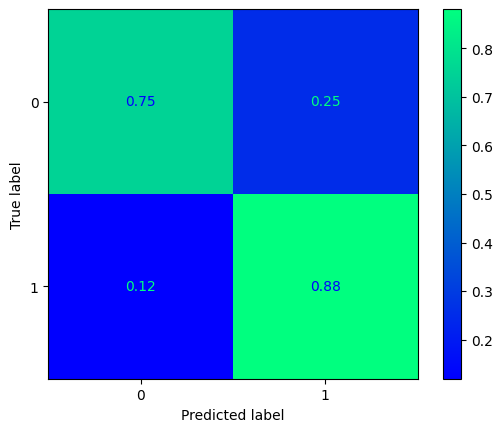

In [116]:
# Volvemos a modelar con los parametros estimados por el grid Y CON EL EQUILIBRADO SMOTE
knn_clf_h1_smote=KNeighborsClassifier(algorithm="auto",leaf_size=10, metric='manhattan', n_jobs=-1, n_neighbors=9,
                     p=1, weights='distance')

# entrenamos el modelo con los datos de entrenamiento y lo evaluamos con los datos de prueba
knn_clf_h1_smote.fit(X_train_smote, y_train_smote)
y_pred_h1_smote=knn_clf_h1_smote.predict(X_test)


print(f"el informe de clasificación con el modelo KNC mejores parametros SMOTE es :\n {classification_report(y_test, y_pred_h1_smote)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_h1_smote, normalize='true', cmap='winter')

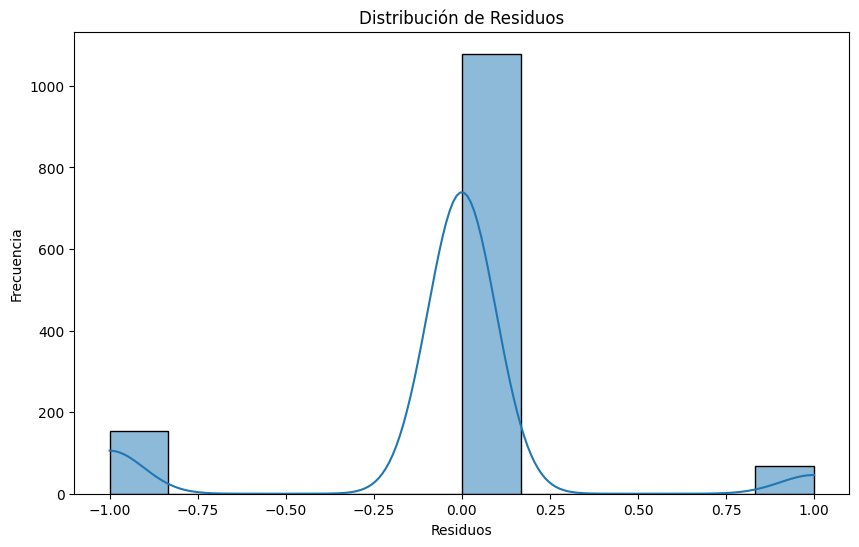

In [117]:
residuos = y_test - y_pred_h1
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [118]:
# hipotesis si lo valores residuales son normales( por debajo de 0.05)
statistic, pvalue = shapiro(residuos)
print(f"statistic:{statistic}")
print(f"p_value:{pvalue}")

# rechazamos la hipotesis nula que los residuos son normales, es decir son anormales en este modelo


statistic:0.5577244155323654
p_value:3.722037990478843e-49


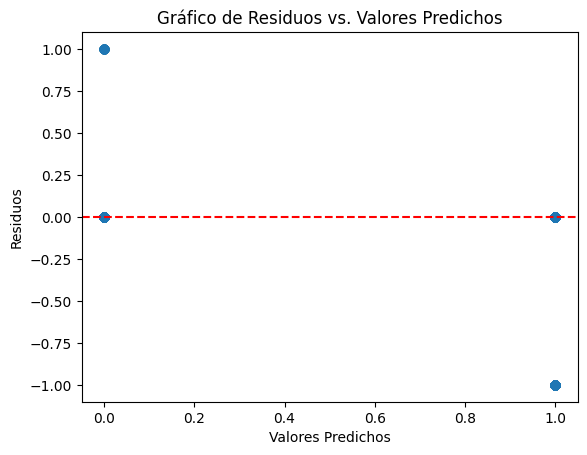

In [119]:
# grafica para ver el ajuste
plt.scatter(y_pred_h1, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

# el modelo se ajusta a los datos en general

2. LIGHTGBM

In [128]:
#2 modelo

#split
X= df_wine_stand.drop(["target_clf"], axis=1)
y= df_wine_stand["target_clf"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)



In [130]:
lbm_clf=LGBMClassifier()

lbm_clf.fit(X_train,y_train)
y_pred=lbm_clf.predict(X_test)

#evaluacion
print(f"El informe de clasificación con el modelo LBM  es :\n {classification_report(y_test, y_pred)}")




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3294, number of negative: 1903
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633827 -> initscore=0.548671
[LightGBM] [Info] Start training from score 0.548671
El informe de clasificación con el modelo LBM  es :
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       481
           1       0.83      0.89      0.86       819

    accuracy                           0.81      1300
   macro avg       0.81      0.79      0.80      1300
weighted avg       0.81      0.81      0.81      1300



In [131]:
# optimizamos
lbm_clf = LGBMClassifier()

# Definir la grilla de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de estimadores (árboles) en el modelo
    'learning_rate': [0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [5, 10, 15],  # Profundidad máxima de los árboles
    'num_leaves': [10, 20, 30]  # Número máximo de hojas en los árboles
}     


# Definir el objeto GridSearchCV
grid = GridSearchCV(estimator=lbm_clf, param_grid=param_grid, cv=5, scoring='balanced_accuracy',verbose=2, n_jobs=-1)

# Entrenar la grilla de búsqueda
grid.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid.best_params_)

# Mostrar el mejor puntaje
print("Mejor puntaje de precisión encontrado:", grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3294, number of negative: 1903
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633827 -> initscore=0.548671
[LightGBM] [Info] Start training from score 0.548671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [133]:
lbm_clf=LGBMClassifier(learning_rate=0.1, max_depth=10,n_estimators=300,num_leaves=30)

lbm_clf.fit(X_train,y_train)
y_pred_h2=lbm_clf.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3294, number of negative: 1903
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633827 -> initscore=0.548671
[LightGBM] [Info] Start training from score 0.548671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

El informe de clasificación con el modelo LBM optimizado con los mejores parametros es :
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       481
           1       0.84      0.88      0.86       819

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.81      1300
weighted avg       0.82      0.82      0.82      1300



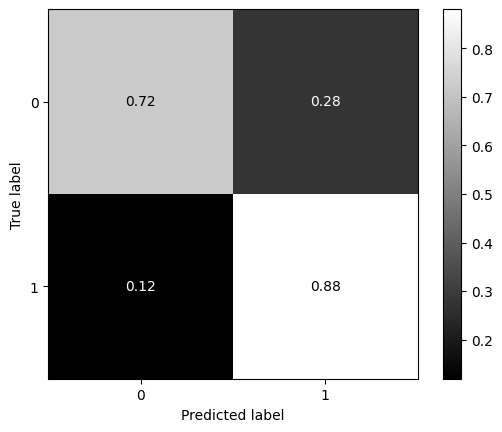

In [135]:
#evaluacion
print(f"El informe de clasificación con el modelo LBM optimizado con los mejores parametros es :\n {classification_report(y_test, y_pred_h2)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_h2, normalize='true', cmap="grey")

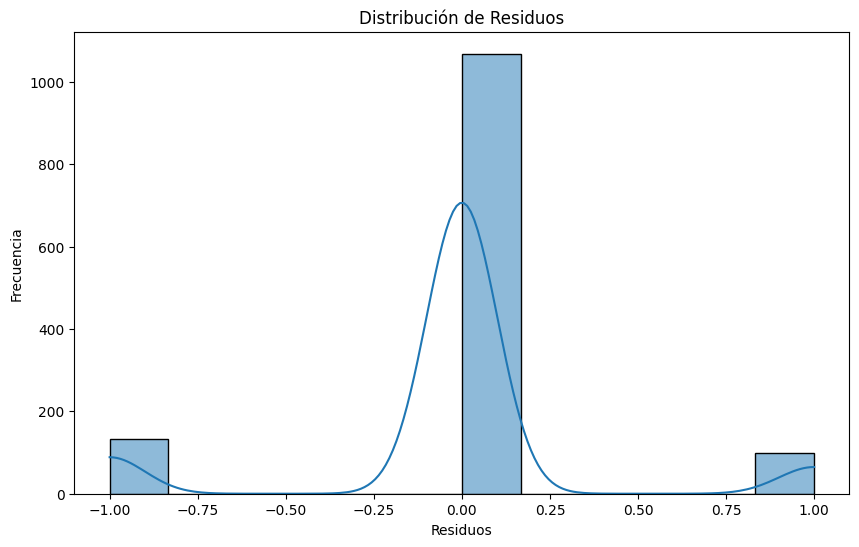

In [136]:
residuos = y_test - y_pred_h2
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

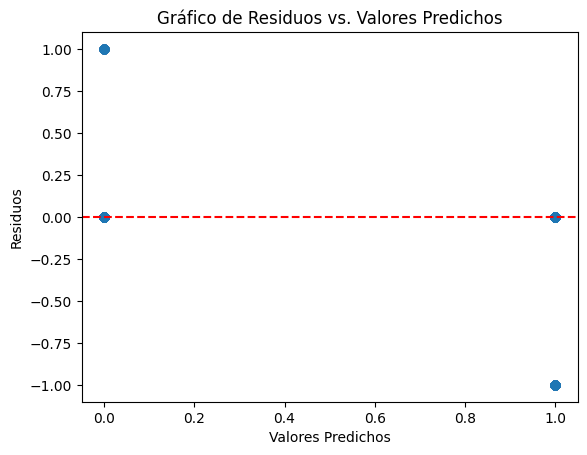

In [137]:
# grafica para ver el ajuste
plt.scatter(y_pred_h2, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()
# moedelo 100& perefecto no cuadra

3.XGBOSSTER

In [138]:
#3 modelo

xgb_clf=XGBClassifier()

xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.79      0.73      0.76       481
           1       0.85      0.89      0.87       819

    accuracy                           0.83      1300
   macro avg       0.82      0.81      0.81      1300
weighted avg       0.83      0.83      0.83      1300



In [145]:
# optimizamos con hiperparametros

xgb_h3 =XGBClassifier()

# Definir la grilla de parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [5, 10, 15],  
    'min_child_weight': [1, 5, 10], 
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'objective': ['binary:logistic'],
      'reg_alpha': [0, 0.1, 0.2], 
    'reg_lambda': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 3],
    'use_label_encoder': [False] # Utilizar el encoder de etiquetas de sklearn para codificar las etiquetas de clase
    }

# Realizar la búsqueda en cuadrícula con validación cruzada
xgb_random_search = RandomizedSearchCV(estimator=xgb_h3, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Entrenar la búsqueda en cuadrícula en los datos de entrenamiento
xgb_random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(xgb_random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Mejores parámetros encontrados:
{'use_label_encoder': False, 'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 0.1, 'reg_alpha': 0.2, 'objective': 'binary:logistic', 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


El informe de clasificación con el modelo XGM optimizado con los mejores parametros es: 
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       481
           1       0.85      0.90      0.88       819

    accuracy                           0.84      1300
   macro avg       0.83      0.82      0.82      1300
weighted avg       0.84      0.84      0.84      1300



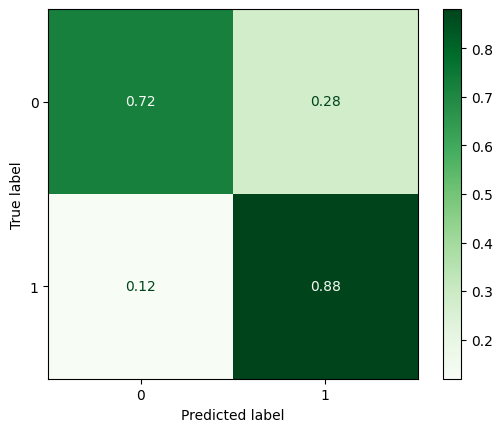

In [148]:

xgb_clf_h3=XGBClassifier(use_label_encoder= False, subsample= 1, scale_pos_weight= 1, reg_lambda= 0.1, reg_alpha= 0.2, 
                          objective= 'binary:logistic', n_estimators=300, min_child_weight=1, max_depth=15,
                          learning_rate= 0.05, gamma= 0, colsample_bytree= 0.8)

xgb_clf_h3.fit(X_train,y_train)
y_pred_h3=xgb_clf_h3.predict(X_test)

print(f"El informe de clasificación con el modelo XGM optimizado con los mejores parametros es: \n {classification_report(y_test, y_pred_h3)}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_h2, normalize='true', cmap='Greens')

## CONCLUSION

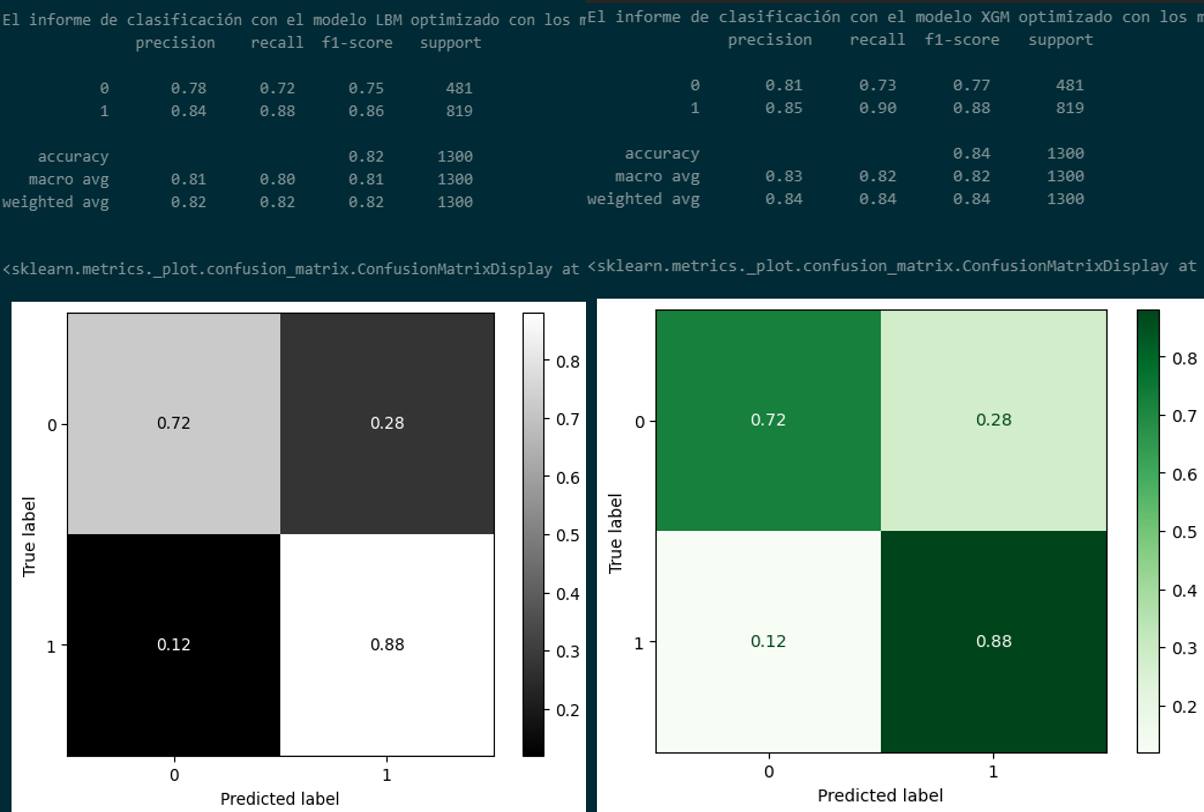

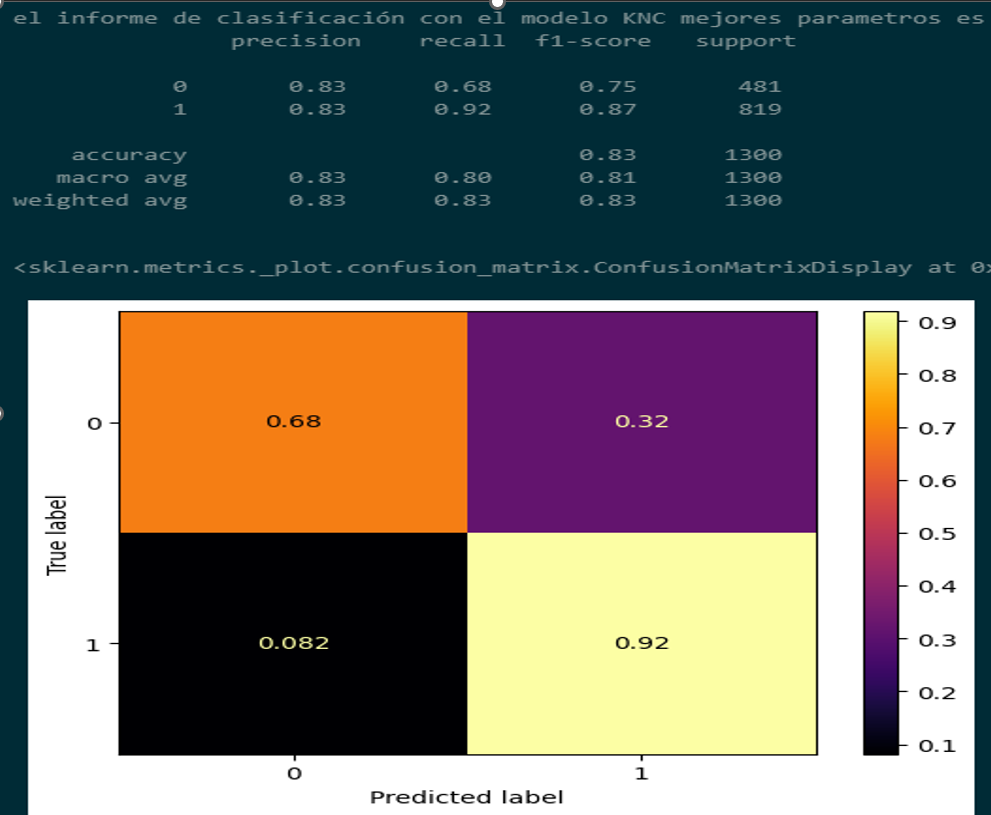

Los tres modelos clasificadores usados dan buenos resultados, pero en este caso el modelo KNN se lleva la victoria, obteniendo una precisión de un 83% ben prediccion de positivos en ambas clases y un recall, bastanate acertado para el  negocio ya que acierta mejor en las calidades  sensoriales de vinos superirores el nivel 5 sobre 10, dejando una sensibilidad un poco peor para los que estan por debajo, pero siendo aun asi de un casi 70% de aciertos.<br>
Por todo lo anterior y teniendo en cuenta el objetivo de negocio, de anticipar las posibles calificación de los vinos por catadores profesionales y a partir de ahí poder planificar la producción , distribucion y precio del vino, y teniendo en cuenta que cada tipo de vino requiere un indice alcoholico diferente junto al resto de caracteristicas, se ha analizado todos los datos centrados en la variable "quality", la cual muestra una distribucion de 10 categorias, obtendiendo como resultado una precisión de un 82% en la deteccion de vinos por encima y debajo de **"quality"** 5, con una capacidad de aciertos de un 92% en vinos con **"quality"** superior a 5 y un 69% en vinos por debajo de ese umbral, siendo las categorias que mas influyen en el modelo predictivo:<br>

**Alcohol**: El porcentaje de contenido de alcohol del vino<br>
**Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.<br>
**Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.<br>
**Cloruros**: La cantidad de sal en el vino.<br>
**Class**: Si es blanco o tinto.<br>



# 3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

In [79]:
df_wine_stand

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target_reg,quality,class_bin
0,1.078000,-0.827205,-0.358913,1.035834,-0.668765,1.581893,0.550093,-0.064855,-1.056361,-1.167179,0.799276,0.267044,0.571367
1,0.931294,-1.194957,0.402485,0.828787,-0.952734,0.604676,0.148529,-0.545502,-1.849842,-1.167179,1.187901,0.267044,0.571367
2,-0.281461,-1.045989,0.468644,-1.092614,-0.543350,0.482554,0.200553,-0.966354,0.646246,0.458258,0.639420,1.298210,0.571367
3,-0.929784,-0.474346,-0.431399,-0.380828,-0.262922,3.665722,2.161136,-0.518790,1.369065,0.796198,0.058521,-4.054460,0.571367
4,0.311107,1.769341,-0.287001,-0.765471,0.835188,-0.574982,-0.080843,0.488795,0.277272,0.389396,-0.558870,0.267044,-1.750190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.471461,0.381340,0.201070,1.139364,0.015105,0.482554,0.871302,0.902064,0.277272,0.526688,-0.201342,-0.923349,0.571367
6493,0.856753,2.288210,-0.727257,-0.919937,0.564121,-2.251138,-2.774114,0.702127,-0.096937,-0.033157,-0.835816,-0.923349,-1.750190
6494,0.229509,-0.135221,1.105048,1.613490,-0.418416,1.336362,1.065314,1.201857,-0.991302,0.458258,-0.929892,-0.923349,0.571367
6495,0.931294,1.875616,-1.594281,-0.380828,1.014651,-0.574982,-1.237007,1.111933,0.462404,0.180164,-0.835816,-0.923349,-1.750190


In [80]:
bt.obtener_estadisticas(df_wine_stand)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
fixed acidity,1.63,float64,-0.0,No,1.0,1.0,-0.64,-0.11,0.47,numerica continua,0.0
volatile acidity,2.88,float64,-0.0,No,1.0,1.0,-0.68,-0.27,0.44,numerica continua,0.0
citric acid,1.37,float64,0.0,No,1.0,1.0,-0.43,-0.0,0.53,numerica continua,0.0
residual sugar,4.86,float64,0.0,No,1.0,1.0,-0.87,-0.34,0.86,numerica continua,0.0
chlorides,3.29,float64,0.0,No,1.0,1.0,-0.54,-0.26,0.29,numerica continua,0.0
free sulfur dioxide,2.08,float64,-0.0,No,1.0,1.0,-0.57,0.2,0.72,numerica continua,0.0
total sulfur dioxide,4.25,float64,0.0,No,1.0,1.0,-0.32,0.29,0.68,numerica continua,0.0
density,15.36,float64,0.0,No,1.0,1.0,-0.79,0.07,0.77,numerica continua,0.0
pH,1.66,float64,-0.0,No,1.0,1.0,-0.67,-0.03,0.65,numerica continua,0.0
sulphates,1.71,float64,-0.0,No,1.0,1.0,-0.7,-0.11,0.53,numerica continua,0.0


In [81]:
X=df_wine_stand.drop('target_reg',axis=1)
y=df_wine_stand['target_reg']

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


1. KNN

In [82]:
from sklearn.metrics import classification_report
knn_reg= KNeighborsRegressor()

knn_reg.fit(X_train,y_train)
y_pred=knn_reg.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("Metricas modelo sin optimizar KNNregression:\n")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")
# buen modelo


Metricas modelo sin optimizar KNNregression:

Mean Absolute Error (MAE): 0.37033089746339076
Mean Squared Error (MSE): 0.25199191967372186
Root Mean Squared Error (RMSE): 0.5019879676583113
Coefficient of Determination (R^2): 0.7505499152523684


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


APLICAMOS VALIDACION CRUZADA

In [83]:
#RMSE
rmse_scores = cross_val_score(knn_reg, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-rmse_scores)

# MAE 
mae_scores= cross_val_score(knn_reg, X, y, scoring='neg_mean_absolute_error', cv=5)
mae_scores = -mae_scores

# MSE
mse_scores = cross_val_score(knn_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores = -mse_scores

# R^2
r2_scores = cross_val_score(knn_reg, X, y, scoring='r2', cv=5)

print("El informe de la métricas de validacion cruzada sin optimizar el KNNregresion es:\n")
print(f'Mean MAE: {mae_scores.mean()}')
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Mean R^2 score: {r2_scores.mean()}')


El informe de la métricas de validacion cruzada sin optimizar el KNNregresion es:

Mean MAE: 0.35814823336916457
Mean MSE: 0.24292840711096217
Mean RMSE: 0.4925534723923118
Mean R^2 score: 0.757114787629677


OPTIMIZACION

In [84]:
knn_reg= KNeighborsRegressor()

# parámetros 
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # Distancia de Minkowski (1 para Manhattan, 2 para Euclidiana)
}

# Definir la métrica a optimizar como el MSE
scoring = 'neg_mean_squared_error'

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=knn_reg, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

Mejores hiperparámetros:
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


APLICAMOS OPTIMIZACION

In [85]:
knn_reg_h= KNeighborsRegressor(n_neighbors=7, p=1,weights="distance")

knn_reg.fit(X_train,y_train)
y_pred=knn_reg.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("El informe de la métricas de validacion cruzada con optimizacion del KNNregresion es:\n")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")

El informe de la métricas de validacion cruzada con optimizacion del KNNregresion es:

Mean Absolute Error (MAE): 0.37033089746339076
Mean Squared Error (MSE): 0.25199191967372186
Root Mean Squared Error (RMSE): 0.5019879676583113
Coefficient of Determination (R^2): 0.7505499152523684


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


APLICAMOS  VALIDACION CRUZADA  DESPUES DE LA OPTIMIZACION

In [86]:
#RMSE
rmse_scores2 = cross_val_score(knn_reg_h, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores2 = np.sqrt(-rmse_scores2)

# MAE 
mae_scores2= cross_val_score(knn_reg_h, X, y, scoring='neg_mean_absolute_error', cv=5)
mae_scores2 = -mae_scores2

# MSE
mse_scores2 = cross_val_score(knn_reg_h, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores2 = -mse_scores2

# R^2
r2_scores2 = cross_val_score(knn_reg_h, X, y, scoring='r2', cv=5)

print("El informe de la métricas de validacion cruzada con optimizacion del KNNregression es:\n")
print(f'Mean MAE: {mae_scores2.mean()}')
print(f'Mean MSE: {mse_scores2.mean()}')
print(f'Mean RMSE: {rmse_scores2.mean()}')
print(f'Mean R^2 score: {r2_scores2.mean()}')


El informe de la métricas de validacion cruzada con optimizacion del KNNregression es:

Mean MAE: 0.26115557722881694
Mean MSE: 0.17624025221524633
Mean RMSE: 0.41930252177915917
Mean R^2 score: 0.8237893941376283


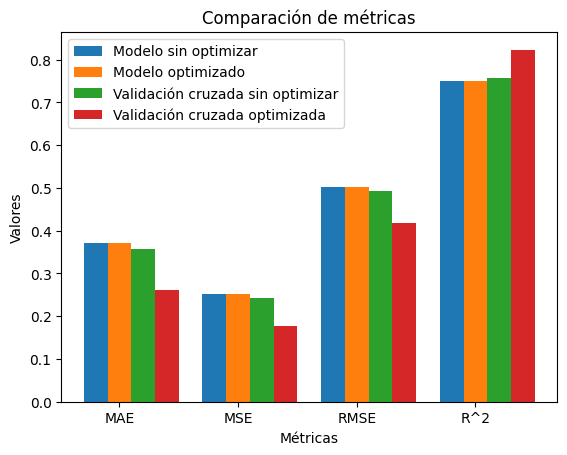

In [96]:
metricas = ['MAE', 'MSE', 'RMSE', 'R^2']
resultados_modelo = [0.370, 0.252, 0.502, 0.751]
resultados_modelo_optimizado = [0.370, 0.251, 0.501, 0.750]
resultados_validacion_cruzada = [0.358, 0.243, 0.493, 0.757]
resultados_validacion_cruzada_optimizado = [0.261, 0.176, 0.419, 0.823]

# Configurar la posición de las barras
x = range(len(metricas))

# Crear el gráfico de barras
plt.bar(x, resultados_modelo, width=0.2, label='Modelo sin optimizar')
plt.bar([i + 0.2 for i in x], resultados_modelo_optimizado, width=0.2, label='Modelo optimizado')
plt.bar([i + 0.4 for i in x], resultados_validacion_cruzada, width=0.2, label='Validación cruzada sin optimizar')
plt.bar([i + 0.6 for i in x], resultados_validacion_cruzada_optimizado, width=0.2, label='Validación cruzada optimizada')

# Añadir etiquetas y leyenda
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.xticks([i + 0.2 for i in x], metricas)
plt.title('Comparación de métricas')
plt.legend()

# Mostrar el gráfico
plt.show()


- El MAE, el MSE Y el RMSE en el modelo optimizado y con validacion cruzada del KNNregresion, representa los valores mas cercanos a 0 y un R2 mas cercano al 1, por lo que es el mejor modelo obtenido con metricas:<br>
    - Mean MAE: 0.26115557722881694
    - Mean MSE: 0.17624025221524633
    - Mean RMSE: 0.41930252177915917
    - Mean R^2 score: 0.8237893941376283


2. MODELO DE REGRESION: GRADIENTBOOSTINGREGRESSOR

In [90]:

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)

#  métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)


print("Metricas modelo sin optimizar GradientBoostingRegressor:\n")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")


Metricas modelo sin optimizar GradientBoostingRegressor:

Mean Absolute Error (MAE): 0.3151096206006761
Mean Squared Error (MSE): 0.1618663334449116
Root Mean Squared Error (RMSE): 0.40232615307100233
Coefficient of Determination (R^2): 0.839766407399482


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


APLICAMOS VALIDACION CRUZADA ANTES DE OPTIMIZAR

In [91]:
#RMSE
rmse_scores3 = cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores3 = np.sqrt(-rmse_scores3)

# MAE 
mae_scores3= cross_val_score(gbr, X, y, scoring='neg_mean_absolute_error', cv=5)
mae_scores3 = -mae_scores3

# MSE
mse_scores3 = cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores3 = -mse_scores3

# R^2
r2_scores3 = cross_val_score(gbr, X, y, scoring='r2', cv=5)

print("El informe de la métricas de validacion cruzada sin optimizacion del GradientBoostingRegressor es:\n")
print(f'Mean MAE: {mae_scores3.mean()}')
print(f'Mean MSE: {mse_scores3.mean()}')
print(f'Mean RMSE: {rmse_scores3.mean()}')
print(f'Mean R^2 score: {r2_scores3.mean()}')

El informe de la métricas de validacion cruzada sin optimizacion del GradientBoostingRegressor es:

Mean MAE: 0.3046196719743798
Mean MSE: 0.1585657492482844
Mean RMSE: 0.3982815945522358
Mean R^2 score: 0.8411582628752601


APLICO OPTIMIZACION DEL MODELO GBR

In [92]:
#modelo GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Entrenar el grid search en los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor estimador
mejores_parametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

print("Mejores hiperparámetros:")
print(mejores_parametros)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1215 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
833 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ba

Mejores hiperparámetros:
{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


OPTIMIZAMOS EL MODELO CON LOS PARAMETROS APORTADOS

In [93]:

gbr_h=GradientBoostingRegressor(learning_rate=0.1, max_depth=7,max_features="sqrt",
                                min_samples_leaf=4, min_samples_split=2, n_estimators=200)
gbr_h.fit(X_train,y_train)
y_pred=gbr_h.predict(X_test)

#  métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)


print("Metricas modelo optimizado GradientBoostingRegressor:\n")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")


Metricas modelo optimizado GradientBoostingRegressor:

Mean Absolute Error (MAE): 0.22499342182521245
Mean Squared Error (MSE): 0.09839409569726738
Root Mean Squared Error (RMSE): 0.31367833157116126
Coefficient of Determination (R^2): 0.902598402591123


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


VALIDACION CRUZADA AL MODELO OPTIMIZADO DE GBR

In [94]:
#RMSE
rmse_scores4 = cross_val_score(gbr_h, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores4 = np.sqrt(-rmse_scores4)

# MAE 
mae_scores4= cross_val_score(gbr_h, X, y, scoring='neg_mean_absolute_error', cv=5)
mae_scores4 = -mae_scores4

# MSE
mse_scores4 = cross_val_score(gbr_h, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores4 = -mse_scores4

# R^2
r2_scores4 = cross_val_score(gbr_h, X, y, scoring='r2', cv=5)

print("El informe de la métricas de validacion cruzada sin optimizacion del GradientBoostingRegressor es:\n")
print(f'Mean MAE: {mae_scores4.mean()}')
print(f'Mean MSE: {mse_scores4.mean()}')
print(f'Mean RMSE: {rmse_scores4.mean()}')
print(f'Mean R^2 score: {r2_scores4.mean()}')

El informe de la métricas de validacion cruzada sin optimizacion del GradientBoostingRegressor es:

Mean MAE: 0.21492510078122007
Mean MSE: 0.09574052520623275
Mean RMSE: 0.3113670581865874
Mean R^2 score: 0.9028719038999755


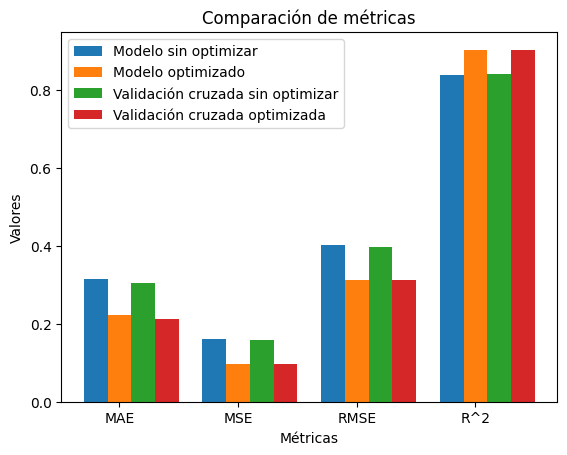

In [97]:
metricas = ['MAE', 'MSE', 'RMSE', 'R^2']
resultados_modelo = [0.315, 0.162, 0.402, 0.839]
resultados_modelo_optimizado =[0.223, 0.097, 0.312, 0.903]
resultados_validacion_cruzada = [0.304, 0.158, 0.398, 0.841]
resultados_validacion_cruzada_optimizado = [0.213,0.097, 0.312, 0.902]

# Configurar la posición de las barras
x = range(len(metricas))

# Crear el gráfico de barras
plt.bar(x, resultados_modelo, width=0.2, label='Modelo sin optimizar')
plt.bar([i + 0.2 for i in x], resultados_modelo_optimizado, width=0.2, label='Modelo optimizado')
plt.bar([i + 0.4 for i in x], resultados_validacion_cruzada, width=0.2, label='Validación cruzada sin optimizar')
plt.bar([i + 0.6 for i in x], resultados_validacion_cruzada_optimizado, width=0.2, label='Validación cruzada optimizada')

# Añadir etiquetas y leyenda
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.xticks([i + 0.2 for i in x], metricas)
plt.title('Comparación de métricas')
plt.legend()

# Mostrar el gráfico
plt.show()

In [98]:

pd.DataFrame({'features':X.columns,
              'importance':gbr_h.feature_importances_}).sort_values('importance',
                                                                  ascending=False)


,features,importance
7,density,0.347410
4,chlorides,0.175170
3,residual sugar,0.122211
10,quality,0.097114
6,total sulfur dioxide,0.063626
0,fixed acidity,0.038364
8,pH,0.035406
1,volatile acidity,0.029425
9,sulphates,0.029103
2,citric acid,0.026033


C:\Users\victo\AppData\Local\Temp\ipykernel_900\2119014956.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=gbr_h.feature_importances_, color='red',  palette="inferno", saturation=0.8, fill=True, width=1, dodge='auto', legend='auto');


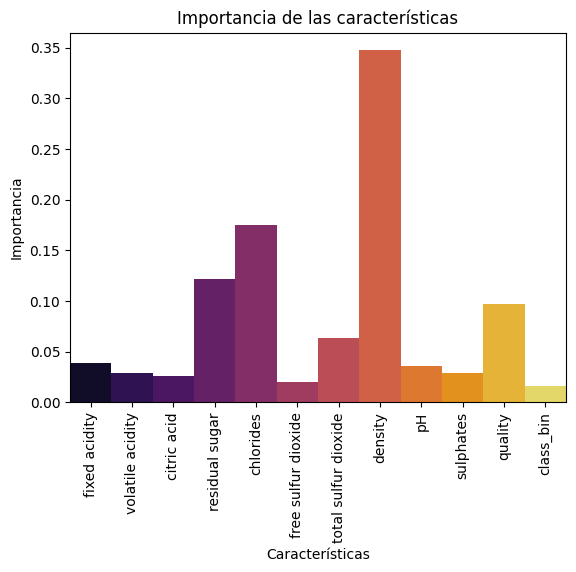

In [140]:
sns.barplot(x=X.columns, y=gbr_h.feature_importances_, color='red',  palette="inferno", saturation=0.8, fill=True, width=1, dodge='auto', legend='auto');
plt.xlabel('Características');
plt.ylabel('Importancia');
plt.title('Importancia de las características');
plt.xticks(rotation=90);
plt.show();

-   El mejor modelo aplicando del GrdientBoostingRegressor es el optimazado con los hiperparametros y aplicada validacion cruzada a los resultados, que que son los que presentan el MAE, MSE y RMSE mas cercano al valor 0 con diferencia. 
-   En este caso el R2 es igual tanto en el modelo optimizado como en el optimzado con validacion cruzada con una puntuacion muy cercana al 1, siendo los valores del mejor:
    - Mean MAE: 0.21385316155887804
    - Mean MSE: 0.0972886013815298
    - Mean RMSE: 0.31256796229769634
    - Mean R^2 score: 0.9024602068888219
-   Además, en el modelo a la target "alcohol" ha sido muy influenciada por las variables:

    - Density:La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
    - Residual_sugar: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
    - Clhorides: La cantidad de sal en el vino.
    - quality(target_clf):  Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).


3. MODELO SVM

In [142]:
svm_reg=SVR(kernel="linear")

svm_reg.fit(X_train, y_train)
y_pred_svm=svm_reg.predict(X_test)

print("Metricas modelo sin optimizar SupportVectorMachine:\n")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")


Metricas modelo sin optimizar SupportVectorMachine:

Mean Absolute Error (MAE): 0.22499342182521245
Mean Squared Error (MSE): 0.09839409569726738
Root Mean Squared Error (RMSE): 0.31367833157116126
Coefficient of Determination (R^2): 0.902598402591123


APLICO VALIDACION CRUZADA ANTES DE OPTIMIZAR


In [143]:
#RMSE
rmse_scores5 = cross_val_score(svm_reg, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores5 = np.sqrt(-rmse_scores5)

# MAE 
mae_scores5= cross_val_score(svm_reg, X, y, scoring='neg_mean_absolute_error', cv=5)
mae_scores5 = -mae_scores5

# MSE
mse_scores5 = cross_val_score(svm_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores5 = -mse_scores5

# R^2
r2_scores5 = cross_val_score(svm_reg, X, y, scoring='r2', cv=5)

print("El informe de la métricas de validacion cruzada sin optimizacion del SupportVectorMachine es:\n")
print(f'Mean MAE: {mae_scores5.mean()}')
print(f'Mean MSE: {mse_scores5.mean()}')
print(f'Mean RMSE: {rmse_scores5.mean()}')
print(f'Mean R^2 score: {r2_scores5.mean()}')

El informe de la métricas de validacion cruzada sin optimizacion del SupportVectorMachine es:

Mean MAE: 0.3203335877692634
Mean MSE: 0.24448771586193704
Mean RMSE: 0.48319481257400854
Mean R^2 score: 0.7550757703331981


OPTIMIZAMOS EL MODELO

In [145]:
svm_reg_h = SVR()

# Definir la grilla de hiperparámetros a explorar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']

}
grid_search = GridSearchCV(estimator=svm_reg, param_grid=param_grid, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# mejores parametros
print("Best Parameters:", best_params)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


APLICAMOS OPTIMIZACION

In [149]:
svm_reg_h=SVR(kernel="rbf", C=10, gamma="scale")

svm_reg_h.fit(X_train, y_train)
y_pred_svm_h=svm_reg.predict(X_test)

print("Metricas modelo optimizaado SupportVectorMachine:\n")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")

Metricas modelo optimizaado SupportVectorMachine:

Mean Absolute Error (MAE): 0.22499342182521245
Mean Squared Error (MSE): 0.09839409569726738
Root Mean Squared Error (RMSE): 0.31367833157116126
Coefficient of Determination (R^2): 0.902598402591123


APLICAMOS VALIDACION CRUZADA AL MODELO OPTIMIZADO

In [148]:
#RMSE
rmse_scores6 = cross_val_score(svm_reg_h, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores6 = np.sqrt(-rmse_scores6)

# MAE 
mae_scores6= cross_val_score(svm_reg_h, X, y, scoring='neg_mean_absolute_error', cv=5)
mae_scores6 = -mae_scores6

# MSE
mse_scores6 = cross_val_score(svm_reg_h, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores6 = -mse_scores6

# R^2
r2_scores6 = cross_val_score(svm_reg_h, X, y, scoring='r2', cv=5)

print("El informe de la métricas de validacion cruzada sin optimizacion del SupportVectorMachine es:\n")
print(f'Mean MAE: {mae_scores6.mean()}')
print(f'Mean MSE: {mse_scores6.mean()}')
print(f'Mean RMSE: {rmse_scores6.mean()}')
print(f'Mean R^2 score: {r2_scores6.mean()}')

El informe de la métricas de validacion cruzada sin optimizacion del SupportVectorMachine es:

Mean MAE: 0.22784022252347996
Mean MSE: 0.10066069452195373
Mean RMSE: 0.3171149720753311
Mean R^2 score: 0.8993174799196266


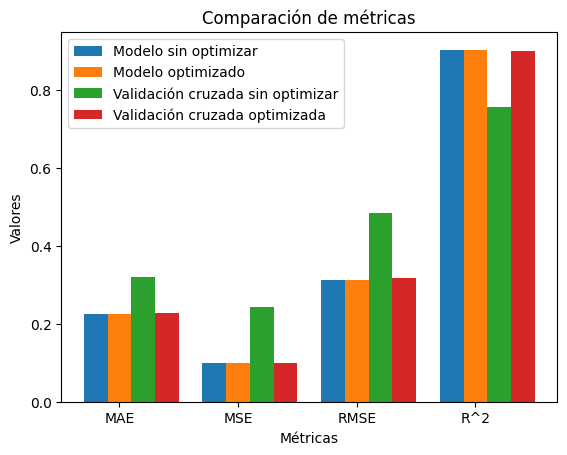

In [150]:
metricas = ['MAE', 'MSE', 'RMSE', 'R^2']
resultados_modelo = [0.224, 0.098, 0.313, 0.902]
resultados_modelo_optimizado =[0.224, 0.098, 0.313, 0.902]
resultados_validacion_cruzada = [0.320, 0.244, 0.483, 0.755]
resultados_validacion_cruzada_optimizado = [0.227,0.100, 0.317, 0.899]

# Configurar la posición de las barras
x = range(len(metricas))

# Crear el gráfico de barras
plt.bar(x, resultados_modelo, width=0.2, label='Modelo sin optimizar')
plt.bar([i + 0.2 for i in x], resultados_modelo_optimizado, width=0.2, label='Modelo optimizado')
plt.bar([i + 0.4 for i in x], resultados_validacion_cruzada, width=0.2, label='Validación cruzada sin optimizar')
plt.bar([i + 0.6 for i in x], resultados_validacion_cruzada_optimizado, width=0.2, label='Validación cruzada optimizada')

# Añadir etiquetas y leyenda
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.xticks([i + 0.2 for i in x], metricas)
plt.title('Comparación de métricas')
plt.legend()

# Mostrar el gráfico
plt.show()

- EL modelo SVM no se ha visto muy afectado ni por la validacion cruzada ni por la optimizacion, pero teniendo resultados muy buenos:

- Metricas modelo optimizado SupportVectorMachine:

    - Mean Absolute Error (MAE): 0.22499342182521245
    - Mean Squared Error (MSE): 0.09839409569726738
    - Root Mean Squared Error (RMSE): 0.31367833157116126
    - Coefficient of Determination (R^2): 0.902598402591123

COMPARACION DE LOS MODELOS DE REGRESION

De los tres modelos analizados en regresion, el que mejores resultados ha dado es el GradientBoostingRegression, aqunque en segundo lugar por decimas esta el SVM


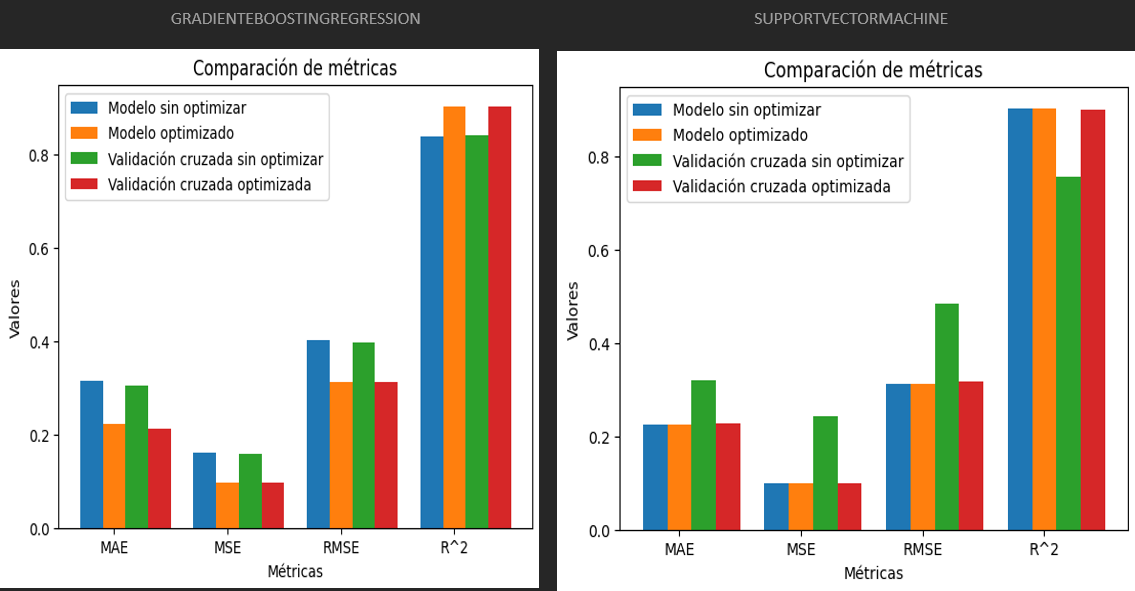

El MSE de ambos modelos( SVM: 0.09839409569726738 y GBR: 0.09574052520623275), es casi  cero, por lo que sus predicciones se acercan mucho a los valores reales.

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.


 En definitiva, teniendo en cuenta el objetivo de negocio, y con una significacion estadistica de casi un 96% de probabilidad de aciertos,  el modelo de predicion GradientBostingRegressor dara muy buenos resultadose en el objetivo de hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes, sin quivocarse mucho porcentualemnte. 